<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-24/blob/main/Simple%20linear%20regression(Deliverytime).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
path = r"/content/delivery_time.csv"

In [5]:
dataset = pd.read_csv(path)

In [6]:
dataset.rename(columns={'Delivery Time': 'DeliveryTime', 'Sorting Time': 'SortingTime'}, inplace=True)

In [7]:
X = dataset[['SortingTime']]
y = dataset['DeliveryTime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model_1 = smf.ols('DeliveryTime ~ SortingTime', data=dataset).fit()
model_2 = smf.ols('DeliveryTime ~ np.log(SortingTime)', data=dataset).fit()
model_3 = smf.ols('DeliveryTime ~ np.sqrt(SortingTime)', data=dataset).fit()
model_4 = smf.ols('DeliveryTime ~ np.exp(SortingTime)', data=dataset).fit()

In [9]:
print("R-squared values:")
print("Model 1 (No transformation):", model_1.rsquared)
print("Model 2 (Log transformation):", model_2.rsquared)
print("Model 3 (Square root transformation):", model_3.rsquared)
print("Model 4 (Exponential transformation):", model_4.rsquared)

R-squared values:
Model 1 (No transformation): 0.6822714748417231
Model 2 (Log transformation): 0.6954434611324223
Model 3 (Square root transformation): 0.695806227630867
Model 4 (Exponential transformation): 0.3611177022709089


In [10]:
best_model = model_1
best_model_name = "Model 1 (No transformation)"
if model_2.rsquared > best_model.rsquared:
    best_model = model_2
    best_model_name = "Model 2 (Log transformation)"
if model_3.rsquared > best_model.rsquared:
    best_model = model_3
    best_model_name = "Model 3 (Square root transformation)"
if model_4.rsquared > best_model.rsquared:
    best_model = model_4
    best_model_name = "Model 4 (Exponential transformation)"

In [11]:
print("Best Model:", best_model_name)

Best Model: Model 3 (Square root transformation)


In [12]:
predictions = best_model.predict(X_test)

In [13]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Absolute Error (Test):", mae)
print("Mean Squared Error (Test):", mse)
print("R-squared (Test):", r2)

Mean Absolute Error (Test): 1.6596906059906549
Mean Squared Error (Test): 5.3739838793658325
R-squared (Test): 0.2269001741039507


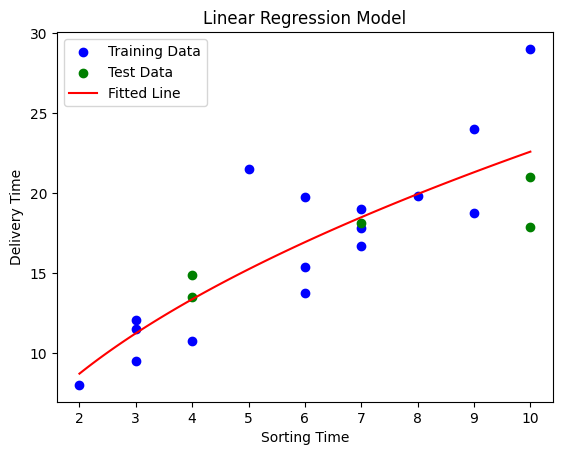

In [14]:
new_data = pd.DataFrame({'SortingTime': np.linspace(X['SortingTime'].min(), X['SortingTime'].max(), 100)})
predictions = best_model.predict(new_data)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(new_data['SortingTime'], predictions, color='red', label='Fitted Line')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Linear Regression Model')
plt.legend()
plt.show()